In [413]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
import warnings
import plotly.express as px
plt.style.use("ggplot")
sns.set_palette("mako")
from scipy.stats import boxcox
from scipy.stats import spearmanr as sr,chi2_contingency
def getPlotLabels(df,column,splot):
    for p in splot.patches:
        splot.annotate(format(p.get_height(), '.0f'), 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha = 'center', va = 'center', 
                       size=15,
                       xytext = (0, -12), 
                       textcoords = 'offset points',
                       fontsize="20",
                       fontweight="bold",
                       color="#e9e9e6")
warnings.filterwarnings('ignore')
df=pd.read_csv("Adult_income.csv")
df

,age,workclass,final-weight,education,educational-num-of-years,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income,Numeric_analyser
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K,Male_<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K,Male_<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K,Male_>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K,Male_>50K
4,18,Private,103497,Some-college,10,Never-married,Craft-repair,Own-child,White,Female,0,0,30,United-States,<=50K,Female_<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K,Female_<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K,Male_>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K,Female_<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K,Male_<=50K


<AxesSubplot:>

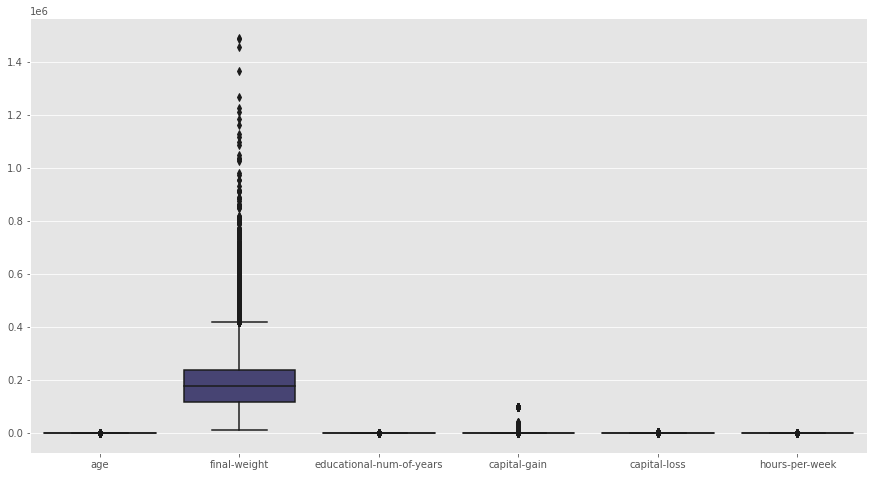

In [414]:
plt.figure(figsize=(15,8))
sns.boxplot(data=df)

so After Looking Over All the boxplots,we know that 
- Age
- final-weight
- capital gain
- capital loss
- hours per week

Lets Transform Age using log and remove the outliers

In [415]:
np.log(7)

1.9459101490553132

In [416]:
2.718281828459045**1.9459101490553132

6.999999999999999

In [417]:
df["age"]=np.log(df["age"])

<AxesSubplot:>

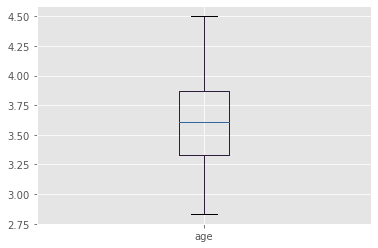

In [418]:
df[["age"]].plot(kind="box")

Lets Now Treat outliers In final-weight

<AxesSubplot:>

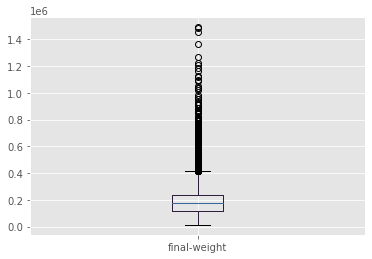

In [419]:
df["final-weight"].plot(kind="box")

In [420]:
limit=np.percentile(df['final-weight'],95)
df=df[df['final-weight'] <= limit]

Lets treat outliers in capital gain and Loss

<AxesSubplot:>

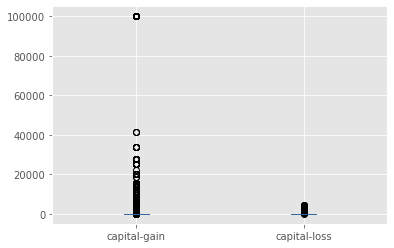

In [421]:
df[["capital-gain","capital-loss"]].plot(kind="box")

We See that two colums have weird distribution,Lets calculate in one column

In [422]:
df["total-capital"]=df["capital-gain"]-df["capital-loss"]

In [423]:
from scipy import stats
df=df[(stats.zscore(df['capital-loss'])>-3) & (stats.zscore(df['capital-loss'])<3)]
df=df[(stats.zscore(df['capital-gain'])>-3) & (stats.zscore(df['capital-gain'])<3)]

<AxesSubplot:>

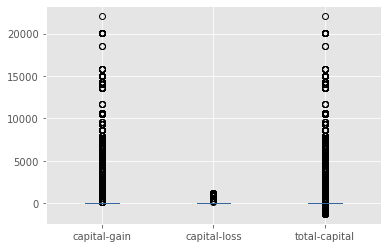

In [424]:
df[["capital-gain","capital-loss","total-capital"]].plot(kind="box")

After merging we understand that,the two colums now have been calculated based on some assumption and now looks little bit good

Lets Now treat Outliers in hours-per-week

In [425]:
df=df[(stats.zscore(df['hours-per-week'])>-3) & (stats.zscore(df['hours-per-week'])<3)]

Lets Encode Our Traget Data but here we will drop the Numeric_analyser bcoz that column was meant for EDA and has no significance and capital gain and loss too as we have calculated the the total capital using profit-loss i.e total price capital.

In [426]:
df.drop(["Numeric_analyser","capital-gain","capital-loss"],axis=1,inplace=True)

In [427]:
from scipy.stats import ttest_ind
np.random.seed(1)
data=df.groupby(["income"]).sample(1000)
for i in df.select_dtypes(["int64","float64"]):
    target_yes = data.loc[data['income']=='<=50K',i]
    target_no = data.loc[data['income']=='>50K',i]
    ttest_results = ttest_ind(target_yes,target_no)
    print(f'{i} vs Target => {ttest_results}')

age vs Target => Ttest_indResult(statistic=-15.548741551529652, pvalue=1.5002767700219344e-51)
final-weight vs Target => Ttest_indResult(statistic=-0.22386366116736497, pvalue=0.8228862796107866)
educational-num-of-years vs Target => Ttest_indResult(statistic=-17.972709325866656, pvalue=4.5760076737473646e-67)
hours-per-week vs Target => Ttest_indResult(statistic=-12.925174041163002, pvalue=9.241113615703657e-37)
total-capital vs Target => Ttest_indResult(statistic=-13.219444108282726, pvalue=2.61717075558987e-38)


From aboove we see that final-weight is having low pv,so we drop it

In [428]:
df.drop(["final-weight"],axis=1,inplace=True)

Lets Transform Our Target variables and gender as they have only two categories.Rest we will One hot encode

In [429]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])
df['income'] = le.fit_transform(df['income'])

Lets Transform categorical variables

In [430]:
df.select_dtypes(["object"]).columns

Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'native-country'],
      dtype='object')

In [431]:
from sklearn.preprocessing import OneHotEncoder as ohc
enc=ohc(drop="first",sparse=False)
encD=enc.fit_transform(df[['workclass', 'education', 'marital-status', 'occupation','relationship', 'race', 'native-country']])
encD=pd.DataFrame(encD,columns=enc.get_feature_names(df[['workclass', 'education', 'marital-status', 'occupation','relationship', 'race', 'native-country']].columns))
encD

,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,education_11th,education_12th,education_1st-4th,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43345,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
43346,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
43347,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
43348,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [432]:
df.drop(['workclass', 'education', 'marital-status', 'occupation','relationship', 'race', 'native-country'],axis=1,inplace=True)

In [433]:
df.reset_index(inplace=True)
encD.reset_index(inplace=True)
df=pd.concat([encD,df],axis=1)

In [434]:
df.drop(["index"],axis=1,inplace=True)

We Have encoded the String values,Lets Now scale numeric columns

In [435]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df[["educational-num-of-years","hours-per-week","total-capital","age"]] = sc.fit_transform(df[["educational-num-of-years","hours-per-week","total-capital","age"]])
df

,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,education_11th,education_12th,education_1st-4th,...,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,age,educational-num-of-years,gender,hours-per-week,income,total-capital
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,-1.014282,-1.198384,1,0.015825,0,-0.242586
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.138630,-0.408331,1,0.906994,0,-0.242586
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,-0.702233,0.776749,1,0.015825,1,-0.242586
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.542300,-0.013304,1,0.015825,1,3.108324
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,-1.918812,-0.013304,0,-0.875344,0,-0.242586
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43345,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,-0.802371,0.776749,0,-0.162409,0,-0.242586
43346,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.279865,-0.408331,1,0.015825,1,-0.242586
43347,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.302958,-0.408331,0,0.015825,0,-0.242586
43348,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,-1.366269,-0.408331,1,-1.766513,0,-0.242586


We Have Scaled and Transformed our Data but one thing keep in mind we have an imbalanced data,so we will have to use undersampling or over sampling or any other technique to make it good. So we will use SMOTE bcoz it provides some add info about minority class compared to Under and OverSampler.

In [436]:
from imblearn.over_sampling import SMOTE
X=df.drop(["income"],axis=1)
Y=df["income"]
sm = SMOTE(random_state = 42)
X,Y=sm.fit_resample(X,Y)

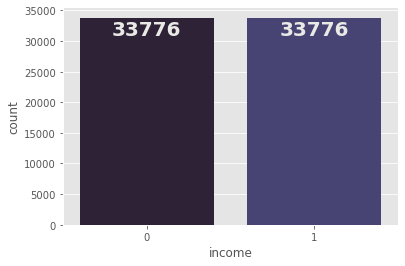

In [437]:
from collections import Counter
ax=sns.countplot(x="income",data=pd.DataFrame(Y))
getPlotLabels(pd.DataFrame(Y),"income",ax)

So Now we see that Using Smote, Our Class Counts have been Balanced.Now Lets Split Data using Train test split and then train models

In [438]:
from sklearn.model_selection import train_test_split as tts
XT,XTS,YT,YTS=tts(X,Y,random_state=42,test_size=0.2)

Logistic Regression

In [439]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score,roc_curve,precision_score,recall_score,plot_confusion_matrix,classification_report
models=pd.DataFrame({})
lor=LogisticRegression()
lor.fit(XT,YT)
lor_pred_train=lor.predict(XT)
lor_pred_test=lor.predict(XTS)


In [440]:
def bestModelCV(model):
    cvs=cross_validate(model,X=X,y=Y,cv=10,scoring=["accuracy","roc_auc"],return_estimator=True)
    return cvs["estimator"][cvs["test_accuracy"].tolist().index(max(cvs["test_accuracy"].tolist()))]

In [441]:
from sklearn.model_selection import cross_validate

In [442]:
model_2=LogisticRegression(random_state=2)
predictedValuesTrain=bestModelCV(model_2).predict(XT)
predictedValuesTest=bestModelCV(model_2).predict(XTS)
models=models.append({"BEST_MODEL_SELECTED":model_2,"TRAIN_ACCURACY":accuracy_score(predictedValuesTrain,YT),"TRAIN_FSCORE":f1_score(predictedValuesTrain,YT),"TEST_ACCURACY":accuracy_score(predictedValuesTest,YTS),"TEST_FSCORE":f1_score(predictedValuesTest,YTS)},ignore_index=True)
models

,BEST_MODEL_SELECTED,TEST_ACCURACY,TEST_FSCORE,TRAIN_ACCURACY,TRAIN_FSCORE
0,LogisticRegression(random_state=2),0.833987,0.839774,0.828019,0.832643


Decesion Tree

In [443]:
dtree=DecisionTreeClassifier(criterion="gini")
dtree.fit(XT,YT)
dtree_pred_train=dtree.predict(XT)
dtree_pred_test=dtree.predict(XTS)

In [444]:
model_2=DecisionTreeClassifier(criterion="gini",random_state=2)
predictedValuesTrain=bestModelCV(model_2).predict(XT)
predictedValuesTest=bestModelCV(model_2).predict(XTS)
models=models.append({"BEST_MODEL_SELECTED":model_2,"TRAIN_ACCURACY":accuracy_score(predictedValuesTrain,YT),"TRAIN_FSCORE":f1_score(predictedValuesTrain,YT),"TEST_ACCURACY":accuracy_score(predictedValuesTest,YTS),"TEST_FSCORE":f1_score(predictedValuesTest,YTS)},ignore_index=True)
models

,BEST_MODEL_SELECTED,TEST_ACCURACY,TEST_FSCORE,TRAIN_ACCURACY,TRAIN_FSCORE
0,LogisticRegression(random_state=2),0.833987,0.839774,0.828019,0.832643
1,DecisionTreeClassifier(random_state=2),0.971431,0.971580,0.968968,0.968890


NaiveBayes

In [445]:
nby=GaussianNB()
nby.fit(XT,YT)
nby_pred_train=nby.predict(XT)
nby_pred_test=nby.predict(XTS)

In [446]:
model_2=nby
predictedValuesTrain=bestModelCV(model_2).predict(XT)
predictedValuesTest=bestModelCV(model_2).predict(XTS)
models=models.append({"BEST_MODEL_SELECTED":model_2,"TRAIN_ACCURACY":accuracy_score(predictedValuesTrain,YT),"TRAIN_FSCORE":f1_score(predictedValuesTrain,YT),"TEST_ACCURACY":accuracy_score(predictedValuesTest,YTS),"TEST_FSCORE":f1_score(predictedValuesTest,YTS)},ignore_index=True)
models

,BEST_MODEL_SELECTED,TEST_ACCURACY,TEST_FSCORE,TRAIN_ACCURACY,TRAIN_FSCORE
0,LogisticRegression(random_state=2),0.833987,0.839774,0.828019,0.832643
1,DecisionTreeClassifier(random_state=2),0.971431,0.971580,0.968968,0.968890
2,GaussianNB(),0.720746,0.772286,0.716993,0.768546


KNN

In [447]:
knn=KNeighborsClassifier(n_neighbors=3,n_jobs=-1)
knn.fit(XT,YT)
knn_pred_train=knn.predict(XT)
knn_pred_test=knn.predict(XTS)

In [448]:
model_2=knn
predictedValuesTrain=bestModelCV(model_2).predict(XT)
predictedValuesTest=bestModelCV(model_2).predict(XTS)
models=models.append({"BEST_MODEL_SELECTED":model_2,"TRAIN_ACCURACY":accuracy_score(predictedValuesTrain,YT),"TRAIN_FSCORE":f1_score(predictedValuesTrain,YT),"TEST_ACCURACY":accuracy_score(predictedValuesTest,YTS),"TEST_FSCORE":f1_score(predictedValuesTest,YTS)},ignore_index=True)
models

,BEST_MODEL_SELECTED,TEST_ACCURACY,TEST_FSCORE,TRAIN_ACCURACY,TRAIN_FSCORE
0,LogisticRegression(random_state=2),0.833987,0.839774,0.828019,0.832643
1,DecisionTreeClassifier(random_state=2),0.971431,0.971580,0.968968,0.968890
2,GaussianNB(),0.720746,0.772286,0.716993,0.768546
3,"KNeighborsClassifier(n_jobs=-1, n_neighbors=3)",0.914144,0.917555,0.914028,0.916511


GradientBoosting

In [449]:
gbc=GradientBoostingClassifier()
gbc.fit(XT,YT)
gbc_pred_train=gbc.predict(XT)
gbc_pred_test=gbc.predict(XTS)

In [450]:
model_2=GradientBoostingClassifier(random_state=2)
predictedValuesTrain=bestModelCV(model_2).predict(XT)
predictedValuesTest=bestModelCV(model_2).predict(XTS)
models=models.append({"BEST_MODEL_SELECTED":model_2,"TRAIN_ACCURACY":accuracy_score(predictedValuesTrain,YT),"TRAIN_FSCORE":f1_score(predictedValuesTrain,YT),"TEST_ACCURACY":accuracy_score(predictedValuesTest,YTS),"TEST_FSCORE":f1_score(predictedValuesTest,YTS)},ignore_index=True)
models

,BEST_MODEL_SELECTED,TEST_ACCURACY,TEST_FSCORE,TRAIN_ACCURACY,TRAIN_FSCORE
0,LogisticRegression(random_state=2),0.833987,0.839774,0.828019,0.832643
1,DecisionTreeClassifier(random_state=2),0.971431,0.971580,0.968968,0.968890
2,GaussianNB(),0.720746,0.772286,0.716993,0.768546
3,"KNeighborsClassifier(n_jobs=-1, n_neighbors=3)",0.914144,0.917555,0.914028,0.916511
4,GradientBoostingClassifier(random_state=2),0.867441,0.873365,0.858459,0.863472


Adaboost Classifier

In [451]:
adb=AdaBoostClassifier()
adb.fit(XT,YT)
adb_pred_train=adb.predict(XT)
adb_pred_test=adb.predict(XTS)

In [452]:
model_2=AdaBoostClassifier(random_state=2)
predictedValuesTrain=bestModelCV(model_2).predict(XT)
predictedValuesTest=bestModelCV(model_2).predict(XTS)
models=models.append({"BEST_MODEL_SELECTED":model_2,"TRAIN_ACCURACY":accuracy_score(predictedValuesTrain,YT),"TRAIN_FSCORE":f1_score(predictedValuesTrain,YT),"TEST_ACCURACY":accuracy_score(predictedValuesTest,YTS),"TEST_FSCORE":f1_score(predictedValuesTest,YTS)},ignore_index=True)
models

,BEST_MODEL_SELECTED,TEST_ACCURACY,TEST_FSCORE,TRAIN_ACCURACY,TRAIN_FSCORE
0,LogisticRegression(random_state=2),0.833987,0.839774,0.828019,0.832643
1,DecisionTreeClassifier(random_state=2),0.971431,0.971580,0.968968,0.968890
2,GaussianNB(),0.720746,0.772286,0.716993,0.768546
3,"KNeighborsClassifier(n_jobs=-1, n_neighbors=3)",0.914144,0.917555,0.914028,0.916511
4,GradientBoostingClassifier(random_state=2),0.867441,0.873365,0.858459,0.863472
5,AdaBoostClassifier(random_state=2),0.856561,0.861650,0.847875,0.851561


XGBoost

In [453]:
xgb=XGBClassifier()
xgb.fit(XT,YT)
xgb_pred_train=xgb.predict(XT)
xgb_pred_test=xgb.predict(XTS)

[19:01:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [454]:
model_2=XGBClassifier(random_state=2)
predictedValuesTrain=bestModelCV(model_2).predict(XT)
predictedValuesTest=bestModelCV(model_2).predict(XTS)
models=models.append({"BEST_MODEL_SELECTED":model_2,"TRAIN_ACCURACY":accuracy_score(predictedValuesTrain,YT),"TRAIN_FSCORE":f1_score(predictedValuesTrain,YT),"TEST_ACCURACY":accuracy_score(predictedValuesTest,YTS),"TEST_FSCORE":f1_score(predictedValuesTest,YTS)},ignore_index=True)
models

[19:01:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:01:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:01:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:01:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

,BEST_MODEL_SELECTED,TEST_ACCURACY,TEST_FSCORE,TRAIN_ACCURACY,TRAIN_FSCORE
0,LogisticRegression(random_state=2),0.833987,0.839774,0.828019,0.832643
1,DecisionTreeClassifier(random_state=2),0.971431,0.971580,0.968968,0.968890
2,GaussianNB(),0.720746,0.772286,0.716993,0.768546
3,"KNeighborsClassifier(n_jobs=-1, n_neighbors=3)",0.914144,0.917555,0.914028,0.916511
4,GradientBoostingClassifier(random_state=2),0.867441,0.873365,0.858459,0.863472
5,AdaBoostClassifier(random_state=2),0.856561,0.861650,0.847875,0.851561
6,"XGBClassifier(base_score=None, booster=None, c...",0.916142,0.918000,0.912585,0.913943


RandomForest

In [455]:
rfc=RandomForestClassifier()
rfc.fit(XT,YT)
rfc_pred_train=rfc.predict(XT)
rfc_pred_test=rfc.predict(XTS)

In [456]:
model_2=RandomForestClassifier(random_state=2)
predictedValuesTrain=bestModelCV(model_2).predict(XT)
predictedValuesTest=bestModelCV(model_2).predict(XTS)
models=models.append({"BEST_MODEL_SELECTED":model_2,"TRAIN_ACCURACY":accuracy_score(predictedValuesTrain,YT),"TRAIN_FSCORE":f1_score(predictedValuesTrain,YT),"TEST_ACCURACY":accuracy_score(predictedValuesTest,YTS),"TEST_FSCORE":f1_score(predictedValuesTest,YTS)},ignore_index=True)
models

,BEST_MODEL_SELECTED,TEST_ACCURACY,TEST_FSCORE,TRAIN_ACCURACY,TRAIN_FSCORE
0,LogisticRegression(random_state=2),0.833987,0.839774,0.828019,0.832643
1,DecisionTreeClassifier(random_state=2),0.971431,0.971580,0.968968,0.968890
2,GaussianNB(),0.720746,0.772286,0.716993,0.768546
3,"KNeighborsClassifier(n_jobs=-1, n_neighbors=3)",0.914144,0.917555,0.914028,0.916511
4,GradientBoostingClassifier(random_state=2),0.867441,0.873365,0.858459,0.863472
5,AdaBoostClassifier(random_state=2),0.856561,0.861650,0.847875,0.851561
6,"XGBClassifier(base_score=None, booster=None, c...",0.916142,0.918000,0.912585,0.913943
7,RandomForestClassifier(random_state=2),0.970469,0.970942,0.970763,0.970969


In [457]:
models.sort_values(['TEST_ACCURACY', 'TRAIN_ACCURACY'],ascending=False)

,BEST_MODEL_SELECTED,TEST_ACCURACY,TEST_FSCORE,TRAIN_ACCURACY,TRAIN_FSCORE
1,DecisionTreeClassifier(random_state=2),0.971431,0.971580,0.968968,0.968890
7,RandomForestClassifier(random_state=2),0.970469,0.970942,0.970763,0.970969
6,"XGBClassifier(base_score=None, booster=None, c...",0.916142,0.918000,0.912585,0.913943
3,"KNeighborsClassifier(n_jobs=-1, n_neighbors=3)",0.914144,0.917555,0.914028,0.916511
4,GradientBoostingClassifier(random_state=2),0.867441,0.873365,0.858459,0.863472
5,AdaBoostClassifier(random_state=2),0.856561,0.861650,0.847875,0.851561
0,LogisticRegression(random_state=2),0.833987,0.839774,0.828019,0.832643
2,GaussianNB(),0.720746,0.772286,0.716993,0.768546


From Aboove We See that <font color="green">Decision Tree Classifier</font> has Highest Accuracy in all Models which fit well

<B><I>SO IF WE WANT TO PREDICT VALUE FOR OUR INPUTS THROUGH USERS POINT OF VIEW,THE USER WOULD ENTER BELOW ARRAY, IN REAL WORLD MORE COMPRESSION TECHNIQUE ARE APPLIED TO SELECT RELEVANT FEATURES AS INPUTS USING VARIETY OF FEATURE ELIMINATION TECHNIQUES DEPENING ON NEEDS AND USER WILL HAVE FEW INPUT FIELDS AND GET THE PREDICTION WHEN COLUMNS DECREASE. SO THE BELOW IS A EXAMPLE RANDOMLY TAKEN WHICH WILL BE GIVEN AS INPUT,JUST ASSUME A INPUT IS GIVEN BELOW</I></B>

In [459]:
input_value=np.array([[ 0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  1.        ,  0.        ,  0.        ,  0.60417817,
         1.17177523,  1.        ,  0.46140961, -0.24258564]]).reshape(1,-1)
input_value

array([[ 0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0. 

In [460]:
model_2=DecisionTreeClassifier(criterion="gini",random_state=2)
predictedValuesTest=bestModelCV(model_2)
print(f"The Candidate Has Income {le.inverse_transform(predictedValuesTest.predict(input_value))[0]}")

The Candidate Has Income >50K


<i><b><font color="navy">So aboove Is Our</font><font color="blue"> Income prediction with given Input and Thats Income</font> ><font color="green"><u>50K</u></font></b></i>